# Ideal Temporal Filter

Atick & Redlich (1992). What Does the Retina Know about Natural Scenes?



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Equations For Analysis

We use the following key equations to produce the plots in figures 3 and 4

$K_{exp}$ is the measured filter when measuring response at RGC output(Equation 2.7) is defined as:

$$ |{K_{exp}(f)}| = |K(F)| M(f) = \frac{M(f)\sqrt{\rho}}{{\{M^2(f)[R(f)+N^2]+N_0^2}\}^{\frac{1}{2}}} $$

  

$M(f)$ is the low pass filter (optical MTF of eye combined with visual system's circuit LPF) (Equation 2.8) is:

$$ M(f) = \frac{1}{N} \left[\frac{1}{I_0} \frac{R(f)}{R(f)+N^2}\right]^{\frac{1}{2}} e^{-(|f|/f_c)^\alpha} $$



$R(f)$ is the power law spectrum of natural scenes is defined as:

$$ R(f) = \frac{1}{f^2} $$


$N^2(f)$ is the power of input noise and is defined as: 

$$N^2(f) = \big \langle|n(f)|^2\big \rangle$$

$N_0^2(f)$ is the power of synaptic noise and is defined as: 

$$N_0^2(f) = \big \langle|n_0(f)|^2\big \rangle$$

With the following parameters:

$f_c$ : cuttoff frequency for eye MTF low pass filter in primates  
$\alpha$ : MTF low pass filter fit in primates  
$\rho$ : A lagrangian multiplyer ensuring reversability of processing / retention of information  
$n$ : Quantum noise of world (dominates at low light levels)  
$n_0$ : Synaptic noise of visual system (dominates at high light levels)   

## Predicted Retinal Filter for typical set of parameters (Figure 3)

Plot three curves for a typical set of parameters

curve a : $K_{exp}(f)$ (Equation 2.7)  
curve b : $R(f)^{-1.5}$ (pure whitening filter)   
curve c : $M$ (pure loss pass filter)

We set our 4 free parameters to:

$f_c$ : 22 cycles/deg  
$\alpha$ : 1.4  
$\rho$ : 2.7e5  
$N'$ : 1.0  

In [2]:
#r(f) is the power spectrum of natural scenes (power law)
def r_power_spectrum(f, inaught):
    result = (inaught**2)/(np.absolute(f)**2)
    return(result)

#m(f) is the low pass filter 
def m_low_pass(f, fc, alpha, n, inaught):
    r_f = r_power_spectrum(f, inaught)
    lpf = 1/inaught * r_f/(r_f + n**2)
    exp = -(np.absolute(f)/fc)**alpha
    
    result = 1/n * lpf**0.5 * np.exp(exp)
    return(result)

    
#k(f) is our kernel
def k(f, fc, alpha, rho, nprime, inaught, nnaught):
    n = np.sqrt(inaught*nprime**2)
    #n=inaught
    m_f = m_low_pass(f, fc, alpha, n, inaught)
    numerator = m_f * np.sqrt(rho)
    denominator = (m_f**2 * (r_power_spectrum(f, inaught) + n**2) + nnaught**2)**0.5
    result = numerator / denominator
    return(result)


def whitening_filter(f, inaught):
    filtered = r_power_spectrum(f, inaught)**(-0.5)
    return(filtered)

In [3]:
freqs = np.logspace(-2,2,200)

fc = 22
alpha = 1.4
rho = 2.7e5
nprime = 1
inaught = 1
nnaught = 1

n = np.sqrt(inaught*nprime**2)

curve_a = k(freqs, fc, alpha, rho, nprime, inaught, nnaught)
curve_b = whitening_filter(freqs, inaught)
curve_c = m_low_pass(freqs, fc, alpha, n, inaught)

curve_a = curve_a / 500 #*****

**What is wrong here???** Have to divide curve a by 500 to get it to fit

Text(0.5, 1.0, 'Three Curves - Figure 3')

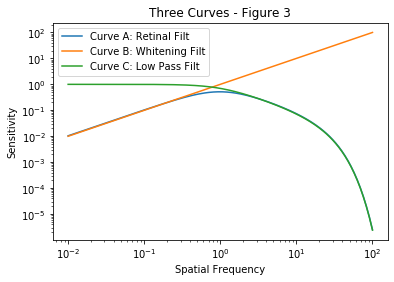

In [4]:
plt.loglog(freqs, curve_a, label='Curve A: Retinal Filt')
#plt.loglog(freqs, r_power_spectrum(freqs, 1), label='Power Spectrum')
plt.loglog(freqs, curve_b, label='Curve B: Whitening Filt')
plt.loglog(freqs, curve_c, label='Curve C: Low Pass Filt')
plt.xlabel('Spatial Frequency')
plt.ylabel('Sensitivity')
plt.legend()
plt.title('Three Curves - Figure 3')

**This plot looks good, but we had to divide curve a by 500 to get it to match with curve b and curve c, so not sure what caused this.**

## Deriving the Family of curves for the ideal spatial decorrelator (Figure 4)

Now, vary $I_0$ to get a family of curves for various luminance levels

And we vary the value of $I_0$ to form individual curve families

In [5]:
#m(f) is the low pass filter 
def m(f, fc, alpha, n, inaught):
    r_f = r_power_spectrum(f, inaught)
    lpf = 1/inaught * r_f/(r_f + n**2)
    exp = -(np.absolute(f)/fc)**alpha
    result = 1/n * (lpf**0.5) * np.exp(exp)
    return(result)

    
#k(f) is our kernel
def k(f, fc, alpha, rho, nprime, inaught, nnaught):
    #n = np.sqrt(inaught*nprime**2)
    n=np.sqrt(inaught)
    m_f = m(f, fc, alpha, n, inaught)
    numerator = m_f * np.sqrt(rho)
    denominator = (m_f**2 * (r_power_spectrum(f, inaught) + n**2) + nnaught**2)**0.5
    result = numerator / denominator
    return(result)

In [14]:
freqs = np.logspace(-1,2,100)

fc = 22.
alpha = 1.4
rho = 270000.
nprime = 1.
nnaught = 1.

#calculate our spectra
inaughts = np.logspace(-2, 2, 5)
kspectra = [k(freqs, fc, alpha, rho, nprime, inaught, nnaught) for inaught in inaughts]                              

Text(0.5, 1.0, 'Varying $I_0$, Figure 4')

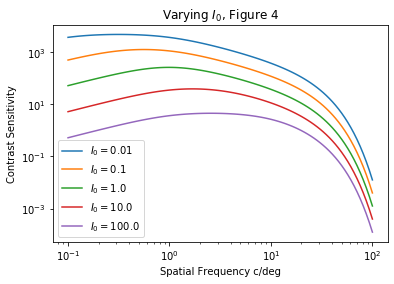

In [15]:
for i in range(len(inaughts)):
    inaught= inaughts[i]
    spec = kspectra[i]
    plt.loglog(freqs, spec, label=f'$I_0 = {inaught}$')
plt.xlabel('Spatial Frequency c/deg')
plt.ylabel('Contrast Sensitivity')
plt.legend()
plt.title('Varying $I_0$, Figure 4')

**These look close to figure 4 from the paper in that the general shape is correct, but still not quite right at low frequencies, where the curves should meet.**

Note however, the data from Van nes & Bouman 1967 which is matched to the curves in the paper, doesn't extend into the flatter region of the curves.   